# OCR Form Recognition Practice

This section will introduce how to use PaddleOCR to complete the training and operation of the table recognition algorithm, including:

1. Understand the principle of table recognition algorithm
3. Master the training and prediction process of PaddleOCR form recognition code


## 1 Quick Experience
To quickly demonstrate the PP-Structure prediction, first download the PaddleOCR code and install the dependency package

In [1]:
# clone PaddleOCR code
# ! git  clone https://github.com/PaddlePaddle/PaddleOCR

# Install dependencies
! pip install -U pip
! pip install -U https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl
! pip install -r PaddleOCR/requirements.txt
! pip install pandas

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl (19.1 MB)
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


After the installation is complete, you can quickly complete the identification of the form through the following command:

In [ ]:
# Switch to working directory
import os
os.chdir('/home/aistudio/PaddleOCR/ppstructure')

In [ ]:
# Download model
! mkdir inference && cd inference
# Download the detection model of the ultra-lightweight table English OCR model and unzip it
! wget -P ./inference/ https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_det_infer.tar && cd inference && tar xf ch_PP-OCRv2_det_infer.tar && cd ..
# Download the recognition model of the ultra-lightweight table English OCR model and unzip it
! wget -P ./inference/ https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_rec_infer.tar && cd inference && tar xf ch_PP-OCRv2_rec_infer.tar && cd ..
# Download the ultra-lightweight English table inch model and unzip it
! wget -P ./inference/ https://paddleocr.bj.bcebos.com/dygraph_v2.0/table/en_ppocr_mobile_v2.0_table_structure_infer.tar && cd inference && tar xf en_ppocr_mobile_v2.0_table_structure_infer.tar && cd ..

mkdir: cannot create directory ‘inference’: File exists
--2021-12-25 20:46:49--  https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_det_infer.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|182.61.200.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3190272 (3.0M) [application/x-tar]
Saving to: ‘./inference/ch_PP-OCRv2_det_infer.tar.2’

ch_PP-OCRv2_det_inf 100%[===================>]   3.04M  6.77MB/s    in 0.4s    

2021-12-25 20:46:49 (6.77 MB/s) - ‘./inference/ch_PP-OCRv2_det_infer.tar.2’ saved [3190272/3190272]

--2021-12-25 20:46:50--  https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_rec_infer.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.c

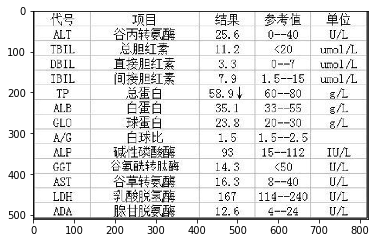

In [ ]:
# First enter the image

import cv2
from matplotlib import pyplot as plt
%matplotlib inline

# Read the table image and display
img = cv2.imread('/home/aistudio/1.jpg')
plt.imshow(img)

In [ ]:
# https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppstructure/table/predict_table.py#L55

from table.predict_table import TableSystem,to_excel
from utility import init_args
# Initialization parameters
args = init_args().parse_args(args=[])
args.det_model_dir='inference/ch_PP-OCRv2_det_infer'
args.rec_model_dir='inference/ch_PP-OCRv2_rec_infer'
args.table_model_dir='inference/en_ppocr_mobile_v2.0_table_structure_infer'
args.image_dir='/home/aistudio/1.jpg'
args.rec_char_dict_path='../ppocr/utils/ppocr_keys_v1.txt'
args.table_char_dict_path='../ppocr/utils/dict/table_structure_dict.txt'
args.det_limit_side_len=736
args.det_limit_type='min'
args.output='../output/table'
args.use_gpu=False

# Initialize the form recognition system
table_sys = TableSystem(args)
img = cv2.imread('/home/aistudio/1.jpg')
# Perform form recognition
pred_html = table_sys(img)
# Store the result to an excel file
to_excel(pred_html,'1.xlsx')
print(pred_html)

[2021/12/26 19:55:37] root DEBUG: dt_boxes num : 69, elapse : 2.900609254837036
[2021/12/26 19:55:43] root DEBUG: rec_res num  : 69, elapse : 5.992196321487427
<html><body><table><thead><tr><td>代号</td><td>项目</td><td>结果</td><td>参考值</td><td>单位</td></tr></thead><tbody><tr><td>ALT</td><td>谷丙转氨酶</td><td>25.6</td><td>0--40</td><td>U/L</td></tr><tr><td>TBIL</td><td>总胆红素</td><td>11.2</td><td><20</td><td>UMOL/L</td></tr><tr><td>DBIL</td><td>直接胆红素</td><td>3.3</td><td>0--7</td><td>UMOL/L</td></tr><tr><td>IBIL</td><td>间接胆红素</td><td>7.9</td><td>1.5--15</td><td>UMOL/L</td></tr><tr><td>TP</td><td>总蛋白</td><td>58.9J</td><td>60--80</td><td>g/L</td></tr><tr><td>ALB</td><td>白蛋白</td><td>35.1</td><td>33--55</td><td>g/L</td></tr><tr><td>GLO</td><td>球蛋白</td><td>23.8</td><td>20--30</td><td>8/L</td></tr><tr><td>A/G</td><td>白球比</td><td>1.5</td><td>1.5--2.5</td><td></td></tr><tr><td>ALP</td><td>碱性磷酸酶</td><td>93</td><td>15--112</td><td>HUSL</td></tr><tr><td>GGT</td><td>谷氨酰转肽酶</td><td>14.3</td><td><50</td><td>U/L</

In [ ]:
# Read excel and display
import pandas as pd
df = pd.read_excel('1.xlsx').fillna('')
print(df)

      代号      项目     结果       参考值      单位
0    ALT   谷丙转氨酶   25.6     0--40     U/L
1   TBIL    总胆红素   11.2       <20  UMOL/L
2   DBIL   直接胆红素    3.3      0--7  UMOL/L
3   IBIL   间接胆红素    7.9   1.5--15  UMOL/L
4     TP     总蛋白  58.9J    60--80     g/L
5    ALB     白蛋白   35.1    33--55     g/L
6    GLO     球蛋白   23.8    20--30     8/L
7    A/G     白球比    1.5  1.5--2.5        
8    ALP   碱性磷酸酶     93   15--112    HUSL
9    GGT  谷氨酰转肽酶   14.3       <50     U/L
10   AST   谷草转氨酶   16.3     8--40     W/L
11   LDH   乳酸脱氢酶    167  114--240     U/L
12   ADA   腺甘脱氨酶   12.6     4--24     U/L


## 2 Detailed Explanation of Prediction Principle:

### 2.1 Introduction to The Overall Pipeline

PP-Structure's table recognition model algorithm is based on an end-to-end method.

The table recognition algorithm consists of three models:
1. Text detection model: used to detect the text in the table
2. Text recognition model: used to recognize the detected text
3. Table cell prediction and table structure prediction model: HTML information and table cell coordinates used to predict table structure

The series process of the three models is shown in the figure below:
<center class="img">
<img src="https://ai-studio-static-online.cdn.bcebos.com/07fad4f0bc6a473f9258d913a9afc380c3cd582cc44f4d0fa4cdbade934e07b5" width="1300"/></center>
<center>Figure 1: Form recognition pipeline</center>


The specific process is:
1. Use the text detection model to detect the text in the table
2. Use the text recognition model to recognize the detected text. At this step, we get the text box and text information
3. Use table cell prediction and table structure prediction models for cell coordinate prediction and table structure HTML information prediction
4. Aggregate the text box in 2 and the cell coordinates in 3, as shown in the figure below, according to the difference between the red text detection box and the blue cell coordinate detection box. IOU</font> to determine whether aggregation is needed.
5. After completing the text box aggregation, sort the text boxes from top to bottom and from left to right. According to the index of the sorted text box, you can get the corresponding text information, and then make a text information as a <font color ="#dd0000">String splicing</font> to get the text content of the final cell.
<center class="img">
<img src="https://ai-studio-static-online.cdn.bcebos.com/32a7368a59f142dcb735247fa7537ae1681c5541f92444388bd916a942fcdfa5" width="1300"/></center>
<center>Figure 2: Schematic diagram of text box and cell coordinate aggregation</center>

### 2.2 Introduction to Table Structure Prediction Model

Form recognition requires three models: text detection, text recognition and table structure recognition models. The text detection and recognition model has been introduced in the previous course, and here is the focus on the table structure prediction model.

The table structure prediction model completes the prediction of table structure and the detection of table cell coordinates. The table structure model is modified from the RARE algorithm, mainly in the following aspects:

#### 2.2.1 Input Data

For the text recognition model, each character marked in the data set is independent, but in the table structure prediction model, the predicted category is not a single character. The following is a dictionary comparison between RARE and the table structure prediction model:

|model| dictionary|
|---|---|
|RARE|`'<', 's', 'u', 'p', '>', '<', '/', 's', 'u', 'b', '>', '<', 'b', '>', '<', '/', 'b', '>', '<', 'i', '>', '<', '/', 'i', '>’`|
|Table structure prediction model|`'sos', '<thead>', '<tr>', '<td>', '</td>', '</tr>', '</thead>', '<tbody>', '</tbody>', '<td', ' colspan="5"', '>', ' colspan="2"', ' colspan="3"', ' rowspan="2"', ' colspan="4"', ' colspan="6"', ' rowspan="3"', ' colspan="9"', ' colspan="10"', ' colspan="7"', ' rowspan="4"', ' rowspan="5"', ' rowspan="9"', ' colspan="8"', ' rowspan="8"', ' rowspan="6"', ' rowspan="7"', ' rowspan="10"', 'eos'`|

In the table structure prediction model, <font color="#dd0000"> treats a string like `<thead>` as one character for recognition</font>.

#### 2.2.2 Model

The comparison chart of the table structure recognition model and EARE is as follows:
<center class="img">
<img src="https://ai-studio-static-online.cdn.bcebos.com/6f08c91824954cb0aba30d816e2d493c58193463acd34a12a366129cc5f89458" width="1300"/></center>
<center>Figure 3: Schematic diagram of table structure recognition model</center>


The RARE model is composed of TPS+CNN+RNN+AttentionHead, and the main functions of each part are as follows:
1. TPS: Correct the curved text to restore the image to a level
2. CNN: feature extraction of images
3. RNN: further enhance the extracted features and extract semantic features
3. AttentionHead: output

In the table structure recognition model, the input image is the entire image, so the TPS module is removed. In addition, it is proved through experiments that RNN has little effect on the result. Therefore, the RNN module is removed. The final table structure recognition model is CNN+AttentionHead.

In order to output the cell coordinates, we tried to detect the cell coordinates in the detection model. On the basis of the DB model, we tried the following schemes 2 and 3.

|Solution | Results|
|---|---|
|1. Single-line text detection|<center class="img"><img src="https://ai-studio-static-online.cdn.bcebos.com/cd8b4dd7df4d411086ba6dd455afcb7b6ab130639aad4607b05293876c64c419" width="1300"/></center>|
|2. Use a model to check text and cells|<center class="img"><img src="https://ai-studio-static-online.cdn.bcebos.com/d93353bacff74545b663be245102d03b716535221f15465284591987144d9fb8" width="1300"/></center>|
|3. Text and cell detection with two models|<center class="img"><img src="https://ai-studio-static-online.cdn.bcebos.com/a84881137cdd49d593abad35bb91f18d31cd49c9e2f44292aa33d7948e43d977" width="1300"/></center>|

It can be seen that the completion of text and cell detection in the segmentation model will lead to the peculiarities of GT: Is the GT of the background between each line in the cell text or background?

Among the three models of the entire table recognition pipeline, only the text detection and table structure recognition models can obtain the information of the entire image. Therefore, an additional regression-based branch is added to the AttentionHead of the table structure recognition model to complete the cell Coordinate (x0, y0, x1, y1) detection

### 2.3 Forward Analysis of Table Structure Prediction Model

Model forward analysis analyzes the output shape changes in each module between image input from preprocessing to network output to better understand table cell prediction and table structure prediction models. The modules involved are as follows:
 
  |Type|Module Name|
  |---|---|
  |Data Processing|ResizeTableImage|
  |Data Processing|PaddingTableImage|
  |Backbone|MobileNetV3|
  |Head|TableAttentionHead|

#### 2.3.1 Input Data Processing
In this example, the input image and the output of the data processing module are visualized as follows:

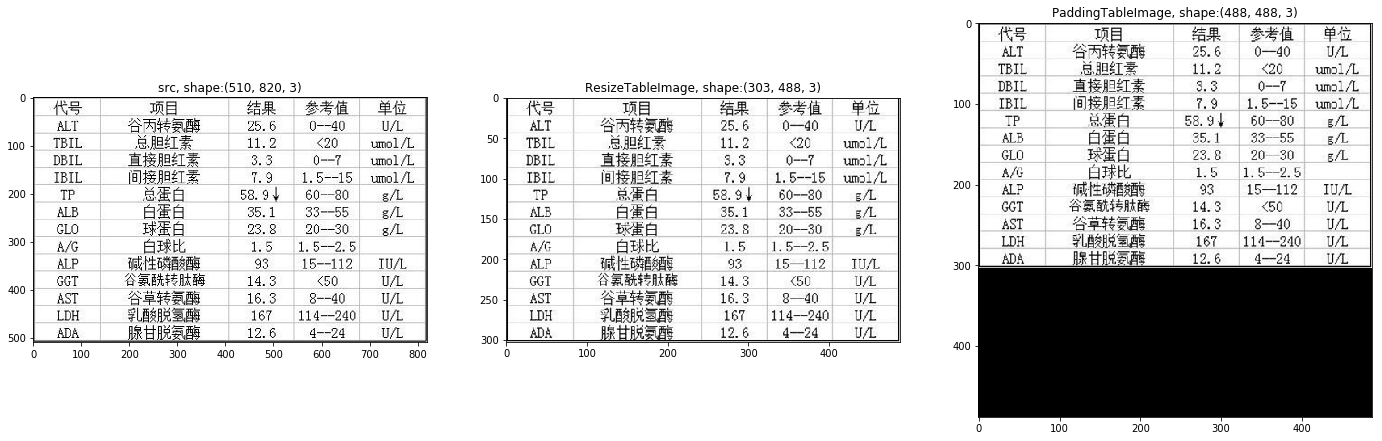

In [ ]:
# Switch to the PaddleOCR directory
os.chdir('/home/aistudio/PaddleOCR')
from ppocr.data import create_operators, transform
plt.figure(figsize=(24,8))

# Read input image
img = cv2.imread('/home/aistudio/1.jpg')

# Display input image
plt.subplot(1,3,1)
plt.title('src, shape:{}'.format(img.shape))
plt.imshow(img)

# implement ResizeTableImage
# https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppocr/data/imaug/gen_table_mask.py#L182

pre_process_list = [{'ResizeTableImage': {'max_len': args.table_max_len }}]  # Scale the long side of the picture to the specified length, and scale the short side in equal proportions
preprocess_op = create_operators(pre_process_list)
data = {'image': img}
data = transform(data, preprocess_op)

# Image after displaying ResizeTableImage
plt.subplot(1,3,2)
plt.title('ResizeTableImage, shape:{}'.format(data['image'].shape))
plt.imshow(data['image'])

# implement PaddingTableImage
# https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppocr/data/imaug/gen_table_mask.py#L232

pre_process_list = [{'PaddingTableImage': None}]
preprocess_op = create_operators(pre_process_list)

data = transform(data, preprocess_op)

# Image after displaying PaddingTableImage
plt.subplot(1,3,3)
plt.title('PaddingTableImage, shape:{}'.format(data['image'].shape))
plt.imshow(data['image']/255)
plt.show()

# Define a complete list of processing ops
pre_process_list = [
    {'ResizeTableImage': {'max_len': args.table_max_len }},
    {'NormalizeImage':{'scale':1./255., 'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225], 'order': 'hwc'}},
    {'PaddingTableImage': None},
    {'ToCHWImage': None}
] 
# Create op list
preprocess_op = create_operators(pre_process_list)
# Execute op list
data = {'image': img}
data = transform(data, preprocess_op)

In [ ]:
# Download the pre-trained model
! wget -P ./pre_train/ https://paddleocr.bj.bcebos.com/dygraph_v2.1/table/en_ppocr_mobile_v2.0_table_structure_train.tar && cd pre_train && tar xf en_ppocr_mobile_v2.0_table_structure_train.tar && cd ..
# Downloaded pre-trained model
import paddle

# Read pre-training parameters and divide them into backbone parameters and head parameters
pretrain_params = paddle.load('/home/aistudio/PaddleOCR/pre_train/en_ppocr_mobile_v2.0_table_structure_train/best_accuracy.pdparams')
def filter_params(pretrain_params,prefix):
    new_dict = {}
    for k,v in pretrain_params.items():
        if k.startswith(prefix):
            new_dict[k.replace(prefix+'.','')] = v
    return new_dict
# Extract parameters
backbone_dict = filter_params(pretrain_params,'backbone')
head_dict = filter_params(pretrain_params,'head')

--2021-12-26 19:56:07--  https://paddleocr.bj.bcebos.com/dygraph_v2.1/table/en_ppocr_mobile_v2.0_table_structure_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|182.61.200.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76103680 (73M) [application/x-tar]
Saving to: ‘./pre_train/en_ppocr_mobile_v2.0_table_structure_train.tar.3’

en_ppocr_mobile_v2. 100%[===================>]  72.58M  36.6MB/s    in 2.0s    

2021-12-26 19:56:09 (36.6 MB/s) - ‘./pre_train/en_ppocr_mobile_v2.0_table_structure_train.tar.3’ saved [76103680/76103680]



#### 2.3.2 Backbone

The backbone is the same as the detected backbone, and both output four feature maps with sizes 1/4, 1/8, 1/16 and 1/32 of the input image. Relevant backbones have been introduced in the text detection chapter, and will not be repeated here.

In [ ]:
# https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppocr/modeling/backbones/det_mobilenet_v3.py

from ppocr.modeling.backbones import build_backbone
# Initialize the backbone
backbone = build_backbone(dict(name='MobileNetV3',scale=1.0,model_name='large'),model_type='table')
backbone.eval()
# Load backbone parameters
backbone.set_state_dict(backbone_dict)

In [ ]:
import numpy as np
x = np.expand_dims(data['image'],axis=0)
x = paddle.to_tensor(x)
backbone_out = backbone(x)
for item in backbone_out:
    print(item.shape)

[1, 24, 122, 122]
[1, 40, 61, 61]
[1, 112, 31, 31]
[1, 960, 16, 16]


#### 2.3.3 Head

The input of the Head is the four feature maps output by the backbone, and the output is the prediction result of the table structure and cell coordinates

The meaning of the input parameters is:
|Parameter|Meaning|
|---|---|
|in_channels|The number of channels of the input feature map|
|hidden_size|The hidden layer unit of the RNN module in Attention|
|max_elem_length|Maximum number of predicted characters|
|in_max_len| The size of the input image|
|loc_type|Input of the output cell coordinate branch<br>1: Only the hidden layer after Attention is used <br>2: Fusion CNN part + Attention part|


The code is as follows:

In [ ]:
# https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppocr/modeling/heads/table_att_head.py

from paddle import nn
import paddle.nn.functional as F
from ppocr.modeling.heads.table_att_head import AttentionGRUCell

class TableAttentionHead(nn.Layer):
    def __init__(self,
                 in_channels,
                 hidden_size,
                 loc_type=2,
                 in_max_len=488,  # Enter the size of the image
                 max_elem_length=800, # Maximum number of labels output
                 **kwargs):
        super(TableAttentionHead, self).__init__()
        self.input_size = in_channels[-1]
        self.hidden_size = hidden_size
        self.elem_num = 30
        self.max_elem_length = max_elem_length

        self.structure_attention_cell = AttentionGRUCell(
            self.input_size, hidden_size, self.elem_num, use_gru=False)
        self.structure_generator = nn.Linear(hidden_size, self.elem_num)
        self.loc_type = loc_type
        self.in_max_len = in_max_len
        
        # Coordinate box regression branch
        if self.loc_type == 1:
            self.loc_generator = nn.Linear(hidden_size, 4)
        else:
            if self.in_max_len == 640:
                # The last feature map after 640 passes through the backbone is 20*20, so the size of the feature map entered here is 400
                self.loc_fea_trans = nn.Linear(400, self.max_elem_length + 1)
            elif self.in_max_len == 800:
                # 800 After the backbone, the last feature map is 23*25, so the size of the feature map entered here is 625
                self.loc_fea_trans = nn.Linear(625, self.max_elem_length + 1)
            elif self.in_max_len == 488:
                # 800 After the backbone, the last feature map is 16*16, so the size of the feature map entered here is 256
                self.loc_fea_trans = nn.Linear(256, self.max_elem_length + 1)
            self.loc_generator = nn.Linear(self.input_size + hidden_size, 4)

    def _char_to_onehot(self, input_char, onehot_dim):
        input_ont_hot = F.one_hot(input_char, onehot_dim)
        return input_ont_hot

    def forward(self, inputs, targets=None):
        # Take out the smallest map output by the backbone
        fea = inputs[-1]
        if len(fea.shape) == 3:
            pass
        else:
            # B,C,H,W reshape as B,C,H*W
            last_shape = int(np.prod(fea.shape[2:])) 
            fea = paddle.reshape(fea, [fea.shape[0], fea.shape[1], last_shape])
            # B,C,W as B,W,C
            fea = fea.transpose([0, 2, 1])
        batch_size = fea.shape[0]

        hidden = paddle.zeros((batch_size, self.hidden_size))
        output_hiddens = []
        if self.training and targets is not None:
            structure = targets[0]
            for i in range(self.max_elem_length + 1):
                elem_onehots = self._char_to_onehot(
                    structure[:, i], onehot_dim=self.elem_num)
                (outputs, hidden), alpha = self.structure_attention_cell(
                    hidden, fea, elem_onehots)
                output_hiddens.append(paddle.unsqueeze(outputs, axis=1))
            output = paddle.concat(output_hiddens, axis=1)
            structure_probs = self.structure_generator(output)
            if self.loc_type == 1:
                loc_preds = self.loc_generator(output)
                loc_preds = F.sigmoid(loc_preds)
            else:
                loc_fea = fea.transpose([0, 2, 1])
                loc_fea = self.loc_fea_trans(loc_fea)
                loc_fea = loc_fea.transpose([0, 2, 1])
                loc_concat = paddle.concat([output, loc_fea], axis=2)
                loc_preds = self.loc_generator(loc_concat)
                loc_preds = F.sigmoid(loc_preds)
        else:
            temp_elem = paddle.zeros(shape=[batch_size], dtype="int32")
            structure_probs = None
            loc_preds = None
            elem_onehots = None
            outputs = None
            alpha = None
            max_elem_length = paddle.to_tensor(self.max_elem_length)
            i = 0
            # Attention forward
            while i < max_elem_length + 1:
                elem_onehots = self._char_to_onehot(
                    temp_elem, onehot_dim=self.elem_num)
                (outputs, hidden), alpha = self.structure_attention_cell(
                    hidden, fea, elem_onehots)
                output_hiddens.append(paddle.unsqueeze(outputs, axis=1))
                structure_probs_step = self.structure_generator(outputs)
                temp_elem = structure_probs_step.argmax(axis=1, dtype="int32")
                i += 1

            output = paddle.concat(output_hiddens, axis=1)
            print('Attention output shape',output.shape)
            # Table structure branch
            structure_probs = self.structure_generator(output)
            structure_probs = F.softmax(structure_probs)

            # Cell coordinate branch
            if self.loc_type == 1:
                loc_preds = self.loc_generator(output)
                loc_preds = F.sigmoid(loc_preds)
            else:
                # B,W,C 改为 B,C,W
                loc_fea = fea.transpose([0, 2, 1])

                loc_fea = self.loc_fea_trans(loc_fea)
                loc_fea = loc_fea.transpose([0, 2, 1])
                loc_concat = paddle.concat([output, loc_fea], axis=2)
                loc_preds = self.loc_generator(loc_concat)
                loc_preds = F.sigmoid(loc_preds)
        return {'structure_probs': structure_probs, 'loc_preds': loc_preds}

In [ ]:
# Initialize head
head = TableAttentionHead(in_channels=backbone.out_channels,hidden_size=256,loc_type=2)
head.eval()
# Load the head parameter
head.set_state_dict(head_dict)

# Execute head
print('*'*10,'head forward shape','*'*10)
head_out = head(backbone_out)
print('*'*10,'head out shape','*'*10)

# Print head output and corresponding shape
for key in head_out:
    print(key,head_out[key].shape)

********** head forward shape **********
Attention output shape [1, 801, 256]
********** head out shape **********
structure_probs [1, 801, 30]
loc_preds [1, 801, 4]


**Post-processing**

The dictionary file for post-processing is ppocr/utils/dict/table_structure_dict.txt

Post-processing decoding ideas:

1. Perform CTC decoding on structure_probs: Don’t use background characters sos and eos, take only one of the consecutively repeated characters
2. The output coordinates are normalized to a value of 0-1, multiply the coordinates by the width and height of the picture, and decode to the image space

['<html>', '<body>', '<table>', '<thead>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '</thead>', '<tbody>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', 

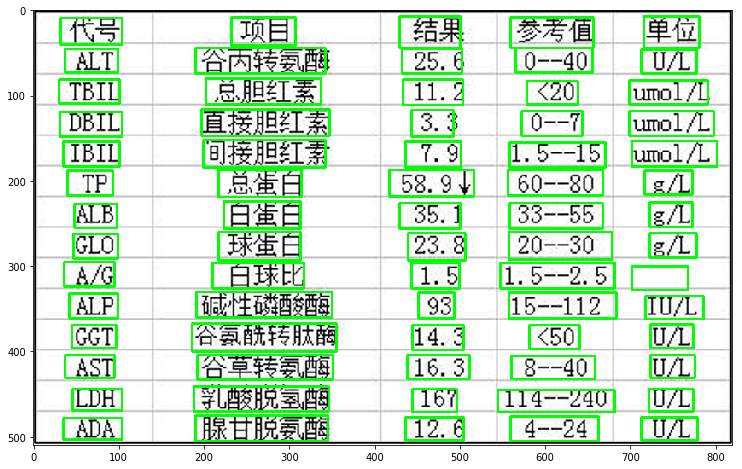

In [ ]:
# https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppocr/postprocess/rec_postprocess.py#L441

from ppocr.postprocess.rec_postprocess import TableLabelDecode

def post_process(out):
    character_dict_path = '/home/aistudio/PaddleOCR/ppocr/utils/dict/table_structure_dict.txt'
    # Processing op after initialization
    post_op = TableLabelDecode(character_dict_path)

    post_result = post_op(out)
    
    structure_str_list = post_result['structure_str_list']

    # The normalized coordinates are restored to the original image size
    res_loc = post_result['res_loc']
    imgh, imgw = img.shape[0:2]
    res_loc_final = []
    for rno in range(len(res_loc[0])):
        x0, y0, x1, y1 = res_loc[0][rno]
        left = max(int(imgw * x0), 0)
        top = max(int(imgh * y0), 0)
        right = min(int(imgw * x1), imgw - 1)
        bottom = min(int(imgh * y1), imgh - 1)
        res_loc_final.append([left, top, right, bottom])
    
    # Structure information processing
    structure_str_list = structure_str_list[0]
    structure_str_list = ['<html>', '<body>', '<table>'] + structure_str_list + ['</table>', '</body>', '</html>']
    return structure_str_list,res_loc_final
structure_str_list,res_loc_final = post_process(head_out)

print(structure_str_list)
print(res_loc_final)

# Visual prediction box
plt.figure(figsize=(24,8))
img_show = img.copy()
for box in res_loc_final:
    cv2.rectangle(img_show, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
plt.imshow(img_show)

## 3 Training

To train table recognition, three models need to be trained, namely text detection, text recognition, and table structure model. For the training in text detection and recognition, you can refer to the previous courses. Only the training process of the table structure model is introduced here.

This section uses the pubtabnet dataset and MobileNetV3 as the table structure model model of the backbone network to introduce how to complete the training, evaluation and testing of the table structure model.

### 3.1 Data Preparation

This experiment selects the PubTabNet data set as our demonstration data set. The sample diagram of the PubTabNet data set is shown in the following figure:
<center class="img">
<img src="https://ai-studio-static-online.cdn.bcebos.com/9732a3b97aff4a4194c5aec210400a8b0031c4f1887548d78f92f6941db0a6bd" width="1300"/></center>
<center>Figure 4: Schematic diagram of PubTabNet data set</center>

Part of the data set of PubTabNet has been downloaded in the project and stored in /home/aistudio/data/data119702. You can run the following command to complete the decompression of the data set, or download it from [https://github.com/ibm-aur-nlp/PubTabNet ](https://github.com/ibm-aur-nlp/PubTabNet) download it by yourself.

In [ ]:
# Unzip the data set
! cd /home/aistudio/data/data119702 && tar -xf pubtabnet_val.tar  && cd -
! ls /home/aistudio/data/data119702

/home/aistudio/PaddleOCR
PubTabNet_2.0.0_val.jsonl  pubtabnet_val.tar  val


After running the above command `/home/aistudio/data/data119702` There is a folder and a file, respectively：
```bash
/home/aistudio/data/data119702
  └─ val/        		 	Picture storage folder
  └─ PubTabNet_2.0.0_val.jsonl/         Label information
```

The label format of this dataset is

```json
{
   'filename': PMC5755158_010_01.png,							# Image name
   'split': ’train‘, 									# Does the image belong to the training set or the validation set?
   'imgid': 0,								 		# The index of the image
   'html': {
     'structure': {'tokens': ['<thead>', '<tr>', '<td>', ...]}, 			#HTML string of the table
     'cell': [
       {
         'tokens': ['P', 'a', 'd', 'd', 'l', 'e', 'P', 'a', 'd', 'd', 'l', 'e'], 	# Single text in the table
         'bbox': [x0, y0, x1, y1]  							# The coordinates of a single text in the table
       }
     ]
   }
}
```

### 3.2 Data Preprocessing

There are certain requirements for the format and size of the input pictures during practice. Therefore, before the data is input into the model, the data needs to be preprocessed to make the pictures and labels meet the needs of network training and prediction.

The data preprocessing of the table structure model mainly includes the following:

* DecodeImage, convert the image to Numpy format
* ResizeTableImage, resize the picture, resize the long side to the specified size, and scale the short side equally
* TableLabelEncode, parse the label information in the label file and save it in a unified format
* NormalizeImage, through the normalization method, the input value distribution of any neuron in each layer of the neural network is changed to a standard normal distribution with a mean value of 0 and a variance of 1, so that the optimization process of the optimal solution will obviously become smooth and the training process Easier to converge;
* PaddingTableImage, pad the short side of the image and pad it to the same size as the long side
* ToCHWImage, the image data format is [H, W, C] (that is, height, width, and number of channels), and the training data format used by the neural network is [C, H, W], so the image data needs to be rearranged , For example [224, 224, 3] becomes [3, 224, 224];
* KeepKeys, dict filtering

**TableLabelEncode**

Analyze the label information in the label file, first load the label data and take out a label

In [ ]:
# Load a piece of data in the data set
import json
from pprint import pprint
with open('/home/aistudio/data/data119702/PubTabNet_2.0.0_val.jsonl', "rb") as f:
    data_lines = f.readlines()
    for line in data_lines:
        data_line = line.decode('utf-8').strip("\n")
        info = json.loads(data_line)
        break

Run the following code to observe the comparison before and after the TableLabelEncode class encoding label.

In [ ]:
from ppocr.data.imaug import TableLabelEncode
# Initialize the label encoder
label_eocoder_op = TableLabelEncode(max_text_length=100,# Unused
                                    max_elem_length=50, # How many cels can be predicted at most for each picture
                                    max_cell_num=500, # unused
                                    character_dict_path='ppocr/utils/dict/table_structure_dict.txt')
# Construct input data
cells = info['html']['cells']
structure = info['html']['structure']
# 2. Print the label before decoding
print("The cells and structure before decode")
print("cells: ", cells)
print("structure: ", structure)

image = cv2.imread(os.path.join('/home/aistudio/data/data119702/val', info['filename']))
data = {'image':image,'cells': cells, 'structure':structure}
# Execute label encoder
data = label_eocoder_op(data)
# Print the encoded information
print("The bbox_list and structure after decode")
print("bbox_list:",data['bbox_list'].tolist())
print("structure:", data['structure'].tolist())

The cells and structure before decode
cells:  [{'tokens': []}, {'tokens': ['<b>', 'W', 'e', 'a', 'n', 'i', 'n', 'g', '</b>'], 'bbox': [66, 4, 96, 13]}, {'tokens': ['<b>', 'W', 'e', 'e', 'k', ' ', '1', '5', '</b>'], 'bbox': [131, 4, 160, 13]}, {'tokens': ['<b>', 'O', 'f', 'f', '-', 't', 'e', 's', 't', '</b>'], 'bbox': [201, 4, 226, 13]}, {'tokens': ['W', 'e', 'a', 'n', 'i', 'n', 'g'], 'bbox': [1, 17, 31, 26]}, {'tokens': ['–'], 'bbox': [66, 21, 72, 25]}, {'tokens': ['–'], 'bbox': [131, 21, 137, 25]}, {'tokens': ['–'], 'bbox': [201, 21, 207, 25]}, {'tokens': ['W', 'e', 'e', 'k', ' ', '1', '5'], 'bbox': [1, 31, 30, 40]}, {'tokens': ['–'], 'bbox': [66, 35, 72, 39]}, {'tokens': ['0', '.', '1', '7', ' ', '±', ' ', '0', '.', '0', '8'], 'bbox': [131, 31, 166, 40]}, {'tokens': ['0', '.', '1', '6', ' ', '±', ' ', '0', '.', '0', '3'], 'bbox': [201, 31, 236, 40]}, {'tokens': ['O', 'f', 'f', '-', 't', 'e', 's', 't'], 'bbox': [1, 45, 26, 54]}, {'tokens': ['–'], 'bbox': [66, 49, 72, 53]}, {'tokens': 

### 3.3 Loss Function Definition

The loss of the model is divided into two parts:
1. structure loss: structure loss uses the common CrossEntropyLoss classification
2. loc loss: loc loss uses MSELoss

The two losses are fused by weighting, and the code summary structure_weight and loc_weight are 100 and 10000 respectively
```python
total_loss = structure_loss * structure_weight + loc_loss * loc_weight
```

### 3.4 Model Training

Once the data processing and loss function definitions are complete, the model can be trained. 

Training is based on PaddleOCR training, in the form of parameter configuration, parameter file reference [https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/configs/table/table_mv3.yml](https://github.com/PaddlePaddle/ PaddleOCR/blob/dygraph/configs/table/table_mv3.yml), the network structure parameters are as follows

```YAML
Architecture:
  model_type: table
  algorithm: TableAttn
  Backbone:
    name: MobileNetV3
    scale: 1.0
    model_name: large
  Head:
    name: TableAttentionHead
    hidden_size: 256
    loc_type: 2
    max_text_length: 100
    max_elem_length: 800
    max_cell_num: 500
```

The loss function parameters are as follows:
```YAML
Loss:
  name: TableAttentionLoss
  structure_weight: 100.0
  loc_weight: 10000.0
```
After the configuration is complete, the training can be started by the following command

In [ ]:
# Configuration data set
# !mkdir -p train_data/table/pubtabnet
!cd train_data/table/pubtabnet && ln -s /home/aistudio/data/data119702/PubTabNet_2.0.0_val.jsonl PubTabNet_2.0.0_train.jsonl  \
&& ln -s /home/aistudio/data/data119702/PubTabNet_2.0.0_val.jsonl PubTabNet_2.0.0_val.jsonl \
&& ln -s /home/aistudio/data/data119702/val train \
&& ln -s /home/aistudio/data/data119702/val val

ln: failed to create symbolic link 'PubTabNet_2.0.0_train.jsonl': File exists


In [ ]:
! python tools/train.py -c configs/table/table_mv3.yml -o Global.use_gpu=False Global.print_batch_step=1 Train.loader.batch_size_per_card=1 Eval.loader.batch_size_per_card=1

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
[2021/12/26 19:57:29] root INFO: Architecture : 
[2021/12/26 19:57:29] root INFO:     Backbone : 
[2021/12/26 19:57:29] root INFO:         model_name : large
[2021/12/26 19:57:29] root INFO:         name : MobileNetV3
[2021/12/26 19:57:29] root INFO:         scale : 1.0
[2021/12/26 19:57:29] root INFO:     Head : 
[2021/12/26 19:57:29] root INFO:         hidden_size : 256
[2021/12/26 19:57:29] root INFO:         l2_decay : 1e-05
[2021/12/26 19:57:29] root INFO:         loc_type : 2
[2021/12/26 19:57:29] root INFO:         max_cell_num : 500
[2021/12/26 19:57:29] root INFO:         max_elem_length : 800
[2021/12/26 19:57:29] root INFO:         max_text_length : 100
[2021/12/26 19:57:29] root INFO:         name : TableAttentionHead
[2021/12/26 19:57:29] root INF

### 3.5 Model Evaluation

During the training process, two models are saved by default, one is the latest trained model named latest, and the other is the model named best_accuracy with the highest accuracy. Next use the saved model parameters to evaluate the accuracy of the test set:

The accuracy evaluation code of the table structure model is located in [PaddleOCR/ppocr/metrics/table_metric.py](https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppocr/metrics/table_metric.py), call tools/eval .py can be used to evaluate the accuracy of the trained model.

In [21]:
!python tools/eval.py -c configs/table/table_mv3.yml -o Global.checkpoints=/home/aistudio/PaddleOCR/pre_train/en_ppocr_mobile_v2.0_table_structure_train/best_accuracy Global.use_gpu=False Eval.loader.batch_size_per_card=1

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
[2021/12/26 20:00:08] root INFO: Architecture : 
[2021/12/26 20:00:08] root INFO:     Backbone : 
[2021/12/26 20:00:08] root INFO:         model_name : large
[2021/12/26 20:00:08] root INFO:         name : MobileNetV3
[2021/12/26 20:00:08] root INFO:         scale : 1.0
[2021/12/26 20:00:08] root INFO:     Head : 
[2021/12/26 20:00:08] root INFO:         hidden_size : 256
[2021/12/26 20:00:08] root INFO:         l2_decay : 1e-05
[2021/12/26 20:00:08] root INFO:         loc_type : 2
[2021/12/26 20:00:08] root INFO:         max_cell_num : 500
[2021/12/26 20:00:08] root INFO:         max_elem_length : 800
[2021/12/26 20:00:08] root INFO:         max_text_length : 100
[2021/12/26 20:00:08] root INFO:         name : TableAttentionHead
[2021/12/26 20:00:08] root INF

### 3.6 Model Prediction

After training the model, you can also use the saved model to perform model inference on a single picture or an image in a folder, and observe the prediction effect of the model.

In [22]:
! python tools/infer_table.py -c configs/table/table_mv3.yml -o Global.checkpoints=/home/aistudio/PaddleOCR/pre_train/en_ppocr_mobile_v2.0_table_structure_train/best_accuracy Global.infer_img=/home/aistudio/1.jpg Global.use_gpu=False

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
[2021/12/26 20:00:22] root INFO: Architecture : 
[2021/12/26 20:00:22] root INFO:     Backbone : 
[2021/12/26 20:00:22] root INFO:         model_name : large
[2021/12/26 20:00:22] root INFO:         name : MobileNetV3
[2021/12/26 20:00:22] root INFO:         scale : 1.0
[2021/12/26 20:00:22] root INFO:     Head : 
[2021/12/26 20:00:22] root INFO:         hidden_size : 256
[2021/12/26 20:00:22] root INFO:         l2_decay : 1e-05
[2021/12/26 20:00:22] root INFO:         loc_type : 2
[2021/12/26 20:00:22] root INFO:         max_cell_num : 500
[2021/12/26 20:00:22] root INFO:         max_elem_length : 800
[2021/12/26 20:00:22] root INFO:         max_text_length : 100
[2021/12/26 20:00:22] root INFO:         name : TableAttentionHead
[2021/12/26 20:00:22] root INF

## 4 Summary

This section introduces the principle of PP-Structure table recognition algorithm in PaddleOCR, and introduces the process of table structure model from data processing to completion of training.

## 5 Assignment

[https://aistudio.baidu.com/aistudio/education/objective/28711](https://aistudio.baidu.com/aistudio/education/objective/28711)